In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pylab as plt


In [ ]:
rating_cols=["User_ID","Movie_ID","Rating","Timestamp"]

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

path_link = "/content/drive/MyDrive/ratings.dat"
rating_matrix=pd.read_csv(path_link,sep='::',header=None,names=rating_cols,engine='python')

Mounted at /content/drive


In [ ]:
rating_cols_1=["User_ID","gender","age","occupation","zipcode"]

In [ ]:
user_matrix=pd.read_csv('/content/drive/MyDrive/users.dat',sep='::',header=None,names=rating_cols_1,engine='python')

In [ ]:
movie_cols=["Movie_Id","Title","Genre"]
movie_matrix=pd.read_csv('/content/drive/MyDrive/movies.dat',sep='::',header=None,names=movie_cols,engine='python',encoding='latin-1')

In [ ]:
movie_matrix.head()

,Movie_Id,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
user_matrix.head()

,User_ID,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
rating_matrix = rating_matrix.rename(columns={'Movie_ID': 'Movie_Id'})


In [ ]:
merged_df = pd.merge(rating_matrix, movie_matrix, on='Movie_Id')

In [ ]:
merged_df.head(10000)

,User_ID,Movie_Id,Rating,Timestamp,Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
9995,4660,2804,5,963873798,"Christmas Story, A (1983)",Comedy|Drama
9996,4688,2804,5,963618748,"Christmas Story, A (1983)",Comedy|Drama
9997,4700,2804,4,963546649,"Christmas Story, A (1983)",Comedy|Drama
9998,4705,2804,4,963535341,"Christmas Story, A (1983)",Comedy|Drama


In [ ]:
merged_df=merged_df.sort_values(by='User_ID')

In [ ]:
merged_df.head(10000)

,User_ID,Movie_Id,Rating,Timestamp,Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
28501,1,48,5,978824351,Pocahontas (1995),Animation|Children's|Musical|Romance
13819,1,938,4,978301752,Gigi (1958),Musical
51327,1,1207,4,978300719,To Kill a Mockingbird (1962),Drama
31152,1,1721,4,978300055,Titanic (1997),Drama|Romance
...,...,...,...,...,...,...
294371,70,1513,4,977878219,Romy and Michele's High School Reunion (1997),Comedy
616164,70,1804,3,977877185,"Newton Boys, The (1998)",Crime|Drama
4226,70,2355,4,977877777,"Bug's Life, A (1998)",Animation|Children's|Comedy
413761,70,3623,3,977878093,Mission: Impossible 2 (2000),Action|Thriller


In [ ]:
merged_df1 = merged_df.assign(Genre=merged_df['Genre'].str.split('|')).explode('Genre').reset_index(drop=True)


In [ ]:
merged_df=merged_df1

In [ ]:
merged_df.head()

,User_ID,Movie_Id,Rating,Timestamp,Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,48,5,978824351,Pocahontas (1995),Animation
2,1,48,5,978824351,Pocahontas (1995),Children's
3,1,48,5,978824351,Pocahontas (1995),Musical
4,1,48,5,978824351,Pocahontas (1995),Romance


In [ ]:
import pandas as pd

# Extract unique values from the 'Genre' column to use as column names
unique_categories = merged_df['Genre'].unique()

# Create an empty dataframe with columns from unique categories
ratings = pd.DataFrame(columns=unique_categories)


In [ ]:
ratings.head()

,Drama,Animation,Children's,Musical,Romance,Thriller,Action,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,Horror,Mystery,Western,Film-Noir,Documentary


In [ ]:
ratings.insert(0, 'user_id','')

In [ ]:
ratings.head()

,user_id,Drama,Animation,Children's,Musical,Romance,Thriller,Action,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,Horror,Mystery,Western,Film-Noir,Documentary


In [ ]:
# Create a pivot table to get the average rating for each user and genre
ratings = merged_df.pivot_table(values='Rating', index='User_ID', columns='Genre', aggfunc='mean')

# Fill NaN values with 0 (for users who didn't watch a particular genre)
ratings = ratings.fillna(0)

# Display the resulting pivot table
print(ratings)

Genre      Action  Adventure  Animation  Children's    Comedy     Crime  \
User_ID                                                                   
1        4.200000   4.000000   4.111111    4.250000  4.142857  4.000000   
2        3.500000   3.736842   0.000000    0.000000  3.560000  3.583333   
3        3.956522   4.000000   4.000000    4.000000  3.766667  0.000000   
4        4.157895   3.833333   0.000000    4.000000  0.000000  5.000000   
5        2.612903   3.000000   4.000000    3.833333  3.410714  3.285714   
...           ...        ...        ...         ...       ...       ...   
6036     3.000000   2.987952   3.911765    3.444444  3.203065  3.528302   
6037     3.642857   4.000000   4.000000    3.666667  3.576271  3.833333   
6038     3.000000   4.000000   3.666667    3.000000  3.833333  0.000000   
6039     4.000000   4.100000   3.615385    3.529412  3.723077  4.000000   
6040     2.976190   2.818182   3.000000    4.000000  3.274510  3.920000   

Genre    Documentary    

In [ ]:
ratings.head(100)

Genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
User_ID,,,,,,,,,,,,,,,,,,
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,0.000000,4.428571,4.0,0.000000,0.000000,4.285714,0.000000,3.666667,4.333333,3.666667,5.000000,0.000000
2,3.500000,3.736842,0.000000,0.000000,3.560000,3.583333,0.000000,3.898734,3.0,4.000000,3.000000,0.000000,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,0.000000,0.000000,4.000000,4.5,0.000000,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,0.000000,4.000000,0.000000,5.000000,0.000000,4.166667,4.5,0.000000,4.333333,0.000000,0.000000,4.000000,3.555556,3.500000,3.333333,4.500000
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,0.0,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.842105,3.888889,3.400000,3.625000,3.476190,3.666667,0.000000,3.723404,4.5,4.000000,0.000000,4.000000,3.500000,3.727273,3.833333,3.722222,4.000000,2.666667
97,4.363636,4.545455,4.500000,4.500000,4.476190,4.642857,0.000000,4.469697,4.5,4.615385,4.090909,4.500000,4.615385,4.650000,4.250000,4.600000,4.444444,4.000000
98,4.000000,3.500000,0.000000,0.000000,3.285714,3.500000,0.000000,4.625000,0.0,0.000000,1.500000,1.000000,4.000000,3.666667,2.666667,3.500000,4.600000,0.000000


In [ ]:
from scipy.linalg import svd

In [ ]:
#This function calculates the Eigenvectors corresponding for U matrice
def calculU(M):
    B = np.dot(M, M.T)

    eigenvalues, eigenvectors = np.linalg.eig(B)
    ncols = np.argsort(eigenvalues)[::-1]

    return eigenvectors[:,ncols]

In [ ]:
#This function calculates the Eigenvectors corresponding for V matrice
def calculVt(M):
    B = np.dot(M.T, M)

    eigenvalues, eigenvectors = np.linalg.eig(B)
    ncols = np.argsort(eigenvalues)[::-1]

    return eigenvectors[:,ncols].T

In [ ]:
#Function that calculates Eigenvalues corresponding to the Sigma Matrix
def calculSigma(M):
    if (np.size(np.dot(M, M.T)) > np.size(np.dot(M.T, M))):
        newM = np.dot(M.T, M)
    else:
        newM = np.dot(M, M.T)

    eigenvalues, eigenvectors = np.linalg.eig(newM)
    eigenvalues = np.sqrt(eigenvalues)
    #Sorting in descending order as the svd function does
    return eigenvalues[::-1]

In [ ]:
#Calling the corresponding Fuctions and saving the values in variables
U = calculU(ratings)
Sigma = calculSigma(ratings)
Vt = calculVt(ratings)


In [ ]:
print("-------------------U-------------------")
print(U)
print("\n--------------Sigma----------------")
print(Sigma)
print("\n-------------V transpose---------------")
print(Vt)

-------------------U-------------------
[[ 0.01244711+0.j         -0.02203585+0.j         -0.02468749+0.j
  ...  0.0006694 +0.00341815j  0.00016548-0.002555j
   0.00016548+0.002555j  ]
 [ 0.01136796+0.j         -0.00598045+0.j          0.0276064 +0.j
  ...  0.00231836-0.00169872j  0.00552884+0.00586287j
   0.00552884-0.00586287j]
 [ 0.01288594+0.j         -0.00792497+0.j         -0.02609656+0.j
  ... -0.0178615 -0.00477772j  0.00941511+0.01332029j
   0.00941511-0.01332029j]
 ...
 [ 0.008391  +0.j         -0.02067087+0.j         -0.01134861+0.j
  ...  0.00396372+0.00145579j -0.00020622+0.00272002j
  -0.00020622-0.00272002j]
 [ 0.01500846+0.j          0.00226501+0.j          0.00079232+0.j
  ... -0.00869375+0.00373847j -0.02500412-0.00139045j
  -0.02500412+0.00139045j]
 [ 0.01394683+0.j          0.01961296+0.j          0.00083919+0.j
  ...  0.02307661-0.01753624j  0.02501741+0.03825807j
   0.02501741-0.03825807j]]

--------------Sigma----------------
[  47.09623034   40.87976471   33.608

In [ ]:
U.shape

(6040, 6040)

In [ ]:
Sigma.shape

(18,)

In [ ]:
Vt.shape

(18, 18)

In [ ]:
ratings.shape

(6040, 18)

In [ ]:
newSigma = np.zeros((6040,18))
newSigma[:18, :18] = np.diag(Sigma[:18])

print(ratings,"\n")

A_remake = (U @ newSigma @ Vt)
print(A_remake)


Genre      Action  Adventure  Animation  Children's    Comedy     Crime  \
User_ID                                                                   
1        4.200000   4.000000   4.111111    4.250000  4.142857  4.000000   
2        3.500000   3.736842   0.000000    0.000000  3.560000  3.583333   
3        3.956522   4.000000   4.000000    4.000000  3.766667  0.000000   
4        4.157895   3.833333   0.000000    4.000000  0.000000  5.000000   
5        2.612903   3.000000   4.000000    3.833333  3.410714  3.285714   
...           ...        ...        ...         ...       ...       ...   
6036     3.000000   2.987952   3.911765    3.444444  3.203065  3.528302   
6037     3.642857   4.000000   4.000000    3.666667  3.576271  3.833333   
6038     3.000000   4.000000   3.666667    3.000000  3.833333  0.000000   
6039     4.000000   4.100000   3.615385    3.529412  3.723077  4.000000   
6040     2.976190   2.818182   3.000000    4.000000  3.274510  3.920000   

Genre    Documentary    

In [ ]:
# Truncate the user matrix to keep only the first 13 columns
u_new = U[:, :13]

print(u_new.shape)  # This should output (6040, 13)

(6040, 13)


**k means**

In [ ]:
u = pd.DataFrame(u_new)
u = u.apply(np.real)

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,40):
    km = KMeans(n_clusters=i)
    km.fit_predict(u)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

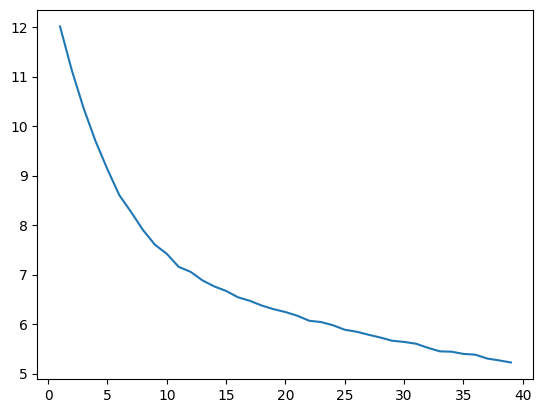

In [ ]:
plt.plot(range(1,40),wcss)

In [ ]:
k=10

In [ ]:
#centroid will be a row but we need random k centroids
def random_centroids(u,k):
  centroids = []
  for i in range(k):
    centroid = u.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)#centroids will become a dataframe

In [ ]:
centroids = random_centroids(u,k)

In [ ]:
centroids

,0,1,2,3,4,5,6,7,8,9
0,0.013295,0.011311,0.009280,0.006893,0.011990,0.013212,0.015607,0.015467,0.013676,0.014815
1,0.000314,0.016383,0.019909,0.003347,-0.009570,-0.000961,-0.016155,-0.019446,0.001662,0.004360
2,0.023322,-0.000444,-0.016449,-0.012913,0.017210,-0.021736,-0.006733,-0.025957,0.005224,-0.000726
3,0.000954,-0.009253,-0.007836,-0.009300,-0.015353,-0.014680,0.028947,-0.015679,0.035830,-0.016593
4,0.001113,-0.006241,-0.003579,-0.010084,-0.013173,-0.009460,-0.027940,-0.006449,-0.005048,-0.004899
5,0.007045,-0.019052,-0.000660,-0.034325,0.009656,-0.000060,-0.005731,-0.010521,-0.012001,-0.019167
6,0.003068,0.020947,-0.004106,-0.000916,0.007716,-0.004677,0.018210,-0.003679,-0.023314,0.006937
7,0.002567,0.004363,0.011515,-0.023362,0.001670,-0.001866,0.003678,0.000090,0.001975,0.003529
8,-0.005306,-0.003350,-0.011300,0.025827,-0.016482,-0.010875,-0.002407,-0.002664,-0.020414,-0.007314
9,0.000902,-0.003789,0.005394,-0.002346,0.012167,0.000547,0.018432,-0.004454,0.000117,0.000417


In [ ]:
#look at each datapoint(each club) in our dataset and find the distance between that datapoint and each cluster center and find closest cluster center to that datapoint
def get_labels(data,centroids):
  distances = centroids.apply(lambda x: np.sqrt(((u - x)**2).sum(axis=1)))
  return distances.idxmin(axis=1) # min distance in each row : cluster assignment

In [ ]:
labels = get_labels(u,centroids)

In [ ]:
labels.value_counts()


5    1252
2     988
0     884
9     682
4     619
7     554
8     352
1     307
3     204
6     198
dtype: int64

In [ ]:
# now update the centroids
# take geometric mean : mean of center points of euclidean space : it gives us center of each cluster
#split df1 by clusters(labels) and then to each group apply the func. which calculates GM
def new_centroids(u,labels,k):
  return u.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [ ]:
#plot cluster assignments in each loop
from sklearn.decomposition import PCA #turn 4d to 2d data for visualixatiom
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
def plot_clusters(u,labels,centroids,iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(u)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
  plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
  plt.show()

In [ ]:
#BODY OF KMEANS CLUSTERING

max_iterations = 300
centroids = random_centroids(u,k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(u,centroids)
  centroids = new_centroids(u,labels,k)# calculate new centroids based on the cluster assignments
  #plot_clusters(u,labels,centroids,iteration)
  iteration += 1

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local

In [ ]:
centroids

,0,1,2,3,4,5,6,7,8,9
0,0.012794,0.012507,0.013363,0.011408,0.011605,0.011709,0.009908,0.010886,0.009917,0.012815
1,0.006426,0.005673,0.001509,0.002520,0.005849,0.003161,0.002638,0.005857,0.003382,0.006921
2,0.005781,0.007507,0.005030,0.009605,0.015235,0.011416,0.009756,0.030237,0.009970,0.003548
3,0.027811,0.005784,0.004796,0.007671,0.006094,0.005013,0.007556,0.005736,0.007602,0.005885
4,0.006631,0.005040,0.022236,0.006374,0.009076,0.008647,0.009312,0.005731,0.006938,0.006273
5,0.010105,0.006378,0.009438,0.006018,0.008153,0.017182,0.011122,0.012359,0.014521,0.003548
6,0.006072,0.019143,0.006996,0.007376,0.029996,0.001591,0.007739,0.003098,0.006254,0.002507
7,0.007035,0.004605,0.005927,0.019333,0.006725,0.005141,0.013358,0.005607,0.009305,0.003474
8,0.006110,0.006327,0.005450,0.011221,0.005135,0.009544,0.009303,0.008734,0.009164,0.004039
9,0.003623,0.006257,0.003935,0.004785,0.003508,0.007220,0.021639,0.003377,0.007216,0.003030


from matplotlib import pyplot as plt
centroids[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
centroids[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
centroids[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
centroids[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)